In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from tensorflow import keras
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина экшена
max_action_len = 50
#Число классов
num_classes = 15

# Загрузка тренировочных данных

In [28]:
train = pd.read_csv('actionsNPCDataSet/trainActions.csv',header=None,
names=['class', 'text'])

In [29]:
#Получение экшенов
actions = train['text']

In [30]:
y_train = utils.to_categorical(train['class'] - 1, num_classes)

# Токенизация

In [31]:
tokenizer = Tokenizer(num_words=num_words)

In [32]:
#Обучение токенайзера
tokenizer.fit_on_texts(actions)

In [33]:
train_sequences = tokenizer.texts_to_sequences(actions)

In [34]:
x_train = pad_sequences(train_sequences, maxlen=max_action_len)

# Загрузка тестовых данных

In [35]:
test = pd.read_csv('actionsNPCDataSet/actionsTest.csv', header=None,
                   names=['class', 'text'])

In [36]:
#Получение экшенов
test_actions = test['text']

In [37]:
y_test = utils.to_categorical(test['class'] - 1, num_classes)

# Токенизация

In [38]:
test_sequences = tokenizer.texts_to_sequences(test_actions)

In [39]:
x_test = pad_sequences(test_sequences, maxlen=max_action_len)

# Модель

In [40]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=116, input_length=max_action_len,
                    embeddings_regularizer=keras.regularizers.l2(0.0001)))
model.add(Conv1D(filters=172, kernel_size=3, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=140, activation='selu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 116)           1160000   
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 172)           60028     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 172)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4128)              0         
                                                                 
 dense_2 (Dense)             (None, 140)               578060    
                                                                 
 dense_3 (Dense)             (None, 15)                2115      
                                                      

In [41]:
history_model = model.fit(x_train,
                          y_train,
                          epochs=5,
                          batch_size=128,
                          validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 7s 83ms/step - loss: 1.9831 - accuracy: 0.5736 - val_loss: 0.8275 - val_accuracy: 0.8738
Epoch 2/5
45/45 [==============================] - 3s 73ms/step - loss: 0.4588 - accuracy: 0.9578 - val_loss: 0.3855 - val_accuracy: 0.9383
Epoch 3/5
45/45 [==============================] - 4s 79ms/step - loss: 0.2076 - accuracy: 0.9913 - val_loss: 0.2187 - val_accuracy: 0.9787
Epoch 4/5
45/45 [==============================] - 3s 78ms/step - loss: 0.1276 - accuracy: 0.9965 - val_loss: 0.1696 - val_accuracy: 0.9802
Epoch 5/5
45/45 [==============================] - 3s 78ms/step - loss: 0.0926 - accuracy: 0.9991 - val_loss: 0.1581 - val_accuracy: 0.9731


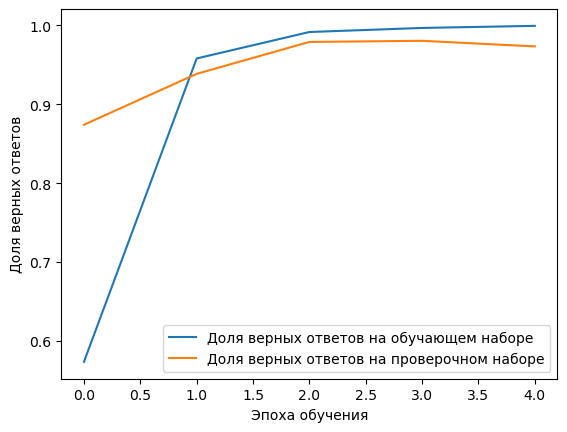

In [42]:
plt.plot(history_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [43]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 9ms/step - loss: 0.1495 - accuracy: 0.9829
1400
1400
